# Комментарий наставника
Привет! 

Случилось непредвиденное и платформу для проверки очень сильно штормило. 
Думаю, что тебя это расстраивает также сильно, как и меня: ты потерял время в ожидании ревью (надеюсь, ты постепенно приступаешь к следующему проекту), а у меня скопилось 6 непроверенных проектов, которые нужно посмотреть настолько быстро, насколько это возможно. 


К сожалению, в жизни такое бывает чаще, чем хотелось бы: стоит начать считать что-то срочное, как вычислительному кластеру становится плохо, что-то падает и ничего не считается. 

Единственный способ компенсировать форс-мажоры - немного снижать требования к работе (в данном случае это означает чуть менее внимательно проверять и чуть менее детально прорабатывать проект, для тебя и меня соответсвенно).

На самом деле, у тебя отличная работа. Есть какие-то недостатки, но с ними можно жить. При других обстоятельствах я бы попросил тебя их переделать, но сейчас предлагаю тебе просто с ними ознакомиться, а в следующем проекте держать учитывать. 

# Описание проекта
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге за несколько лет. Научимся определять рыночную стоимость объектов недвижимости. Вы установите параметры для построения автоматизированной системы, отслеживающей аномалии и мошеннические действия.
По каждой продаваемой квартире у вас есть два вида данных. Первые — вносили сами пользователи при публикации объявлений, вторые — получены на основе картографических данных: расстояния до центра, аэропорта, ближайшего парка и водоёма.

Описание данных

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

# Задание 1. Начало исследования
## Шаг 1. Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime

data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

data.to_csv('2_real_estate_project.csv')

#вывод первых 11 строк набора данных
data.head(11)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
# вывод информации о размере таблицы
data.shape

(23699, 22)

In [3]:
#вывод общей информации о таблице (тип данных в столбце, кол-во записей в столбце)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
# количество дубликатов
data.duplicated().sum()

0

## Шаг 2. Подготовка данных

### 2.1 Определение и заполнение пропусков, приведение данных к нужным типам.

Есть пропуски в столбцах:

- 'ceiling_height'      
- 'floors_total'        
- 'living_area'         
- 'is_apartment'        
- 'kitchen_area'        
- 'balcony'             
- 'locality_name'       
- 'airports_nearest'    
- 'cityCenters_nearest' 
- 'parks_around3000'    
- 'parks_nearest'       
- 'ponds_around3000'    
- 'ponds_nearest'       
- 'days_exposition'     

Заметим небольшое количество пропусков в столбцах 'floors_total' (86) и 'locality_name' (49), при этом мы не можем восстановить значения этих слобцов по значениям в других столбцах - удалим записи, для которых не указано количество этажей в доме или название населенного пункта.

# Комментарий наставника
Мне кажется, лучше здесь использовать data.dropna(subset=[список столбцов])

In [5]:
data = data[(data['floors_total'].isnull() == False) & (data['locality_name'].isnull() == False)].reset_index(drop = 'True')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 12090 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around300

# Комментарий наставника
Я не проходил сам курс от и до, и не знаю, возможно там показывали такой способ с заменой на -1, и даже давали объяснение зачем. Но сейчас из головы я не могу придумать, зачем это делать. NA - это NA, как только вы заполнили это числами, то использовать fillna, например, уже не получится. Но важнее другое: если вдргу забыть и посчитать среднее, то получится полная ерунда, а не среднее, в то время как NA будет игнорироваться при расчетах сумм, средних, медиан и т.д.

Про минус 2 тоже не понимаю. Не можем заполнить, т.е. так и оставим минус 2. А если среднее захотим посчитать, то надо будет писать df[df.smth<>-2].mean() ? Не понимаю, зачем. 

В самих NA-значениях нет ничего страшного. Ну, неизвестно. Можно посчитать какие-то статистики по известным значениям. Удалять данные, заменять на -1, или совершать какие-то ещё действия, совершенно не обязательно. 

Вы можете просто заполнить там, где это кажется важным, а там, где не кажется - пропустить.

Заполним пропуски в столбцах 
- 'ceiling_height'
- 'living_area'
- 'kitchen_area'
- 'days_exposition'

значениями -1. Так мы обозначим неуказанные данные, которые можно позднее заменить на какие-то средние показатели. 

Пропуски в столбцах 'ceiling_height', 'living_area', 'kitchen_area' можно объяснить отсутствием данных от пользователей при публикации объявления. 

Пропуски в столбце 'days_exposition' возможно появились из-за того, что объявление ещё не было снято на момент получения данных.

Заменим пропуски в столбцах 
- 'balcony'
- 'airports_nearest'
- 'cityCenters_nearest'
- 'parks_around3000'
- 'parks_nearest'
- 'ponds_around3000'
- 'ponds_nearest'

значениями -2, эти неуказанные данные невозможно заполнить по значениям других столбцов. Также, приведем данные в этих столбцах к целочисленному типу.

Пропуски в столбце 'is_apartment' заполним значениями False - обычно квартиры не являются апартаментами. В 2760 имеющихся записях всего 50 (1.8%) - апартаменты. 

Также, приведем данные в столбцах 'floors_total' к целочисленному типу.

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(-1)
data['living_area'] = data['living_area'].fillna(-1)
data['kitchen_area'] = data['kitchen_area'].fillna(-1)
data['days_exposition'] = data['days_exposition'].fillna(-1).astype('int')

data['balcony'] = data['balcony'].fillna(-2).astype('int')
data['airports_nearest'] = data['airports_nearest'].fillna(-2).astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-2).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(-2).astype('int')
data['parks_nearest'] = data['parks_nearest'].fillna(-2).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(-2).astype('int')
data['ponds_nearest'] = data['ponds_nearest'].fillna(-2).astype('int')

data['is_apartment'] = data['is_apartment'].fillna(False)

data['floors_total'] = data['floors_total'].astype('int')

# переименуем столбцы 'studio' и 'open_plan' в 'is_studio' и 'is_open_plan' соответственно
change_column_names_dict = {"studio": "is_studio", "open_plan": "is_open_plan"}
data = data.rename(columns = change_column_names_dict)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
is_studio               23565 non-null bool
is_open_plan            23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null int64
cityCenters_nearest     23565 non-null int64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null int64
ponds_around3000        235

In [9]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,-2,Санкт-Петербург,18863,16028,1,482,2,755,-1
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,-1.00,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603,0,-2,0,-2,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,-1.00,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,-1.00,14,-1.0,9,False,False,False,-1.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,-2,Санкт-Петербург,31856,8098,2,112,1,48,121


Перейдем к обработке пропусков в столбцах 
- 'ceiling_height'
- 'living_area'
- 'kitchen_area'

Сначала посмотрим, есть ли взаимосвязь между известными значениями.
Выделим строки с заполненными значениями в отдельный датасет и выведем матрицу коээфициентов корреляции.

# Комментарий наставника
И становится только хуже. По факту, вы удалили данные, в которых не было kitchen_area, living_area и ceiling_height, но были многие другие значения. Зачем тогда было заменять на -1? 

Ну и площадь кухни вполне можно как-то заполнить.
А считать статистику по этажам можно и не зная площадь кухни.

In [10]:
data_available = data\
           .query('(ceiling_height > 0) and (living_area > 0) and (kitchen_area > 0)')\
           [['total_area','rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area']]

print(data_available.head())
print(data_available.describe())
print(data_available.corr())

    total_area  rooms  ceiling_height  floors_total  living_area  floor  \
0        108.0      3            2.70            16         51.0      8   
4        100.0      2            3.03            14         32.0     13   
9         61.0      3            2.50             9         43.6      7   
10        39.6      1            2.67            12         20.3      3   
13        42.8      2            2.56             5         27.0      5   

    kitchen_area  
0           25.0  
4           41.0  
9            6.5  
10           8.5  
13           5.2  
         total_area         rooms  ceiling_height  floors_total   living_area  \
count  13318.000000  13318.000000    13318.000000  13318.000000  13318.000000   
mean      61.890948      2.151299        2.764869     10.136958     35.777321   
std       35.933444      1.087248        1.246797      6.165280     22.857262   
min       17.000000      1.000000        1.000000      1.000000      2.000000   
25%       41.400000      1.000

Относительно высокая взаимосвязь (к. корреляции > 0.5) есть у данных в столбцах 
- 'total_area' - 'rooms' (0.77)
- 'total_area' - 'living_area' (0.94)
- 'total_area' - 'kitchen_area' (0.61)
- 'living_area' - 'rooms' (0.85)

Начнем с пары с самым большим коэффициентом - 'total_area' - 'living_area' (0.94).

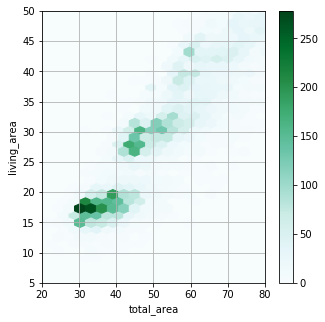

In [11]:
data_available.plot(x='total_area', xlim=(20, 80),\
                    y='living_area', ylim=(5, 50),\
                    kind='hexbin', gridsize=300, figsize=(5, 5),\
                    sharex=False, grid=True)

# Комментарий наставника
И здесь продложается проблема. ты смотришь зависимость total_area от living_area исключив из рассмотрения в том числе данные, где нет высоты потолков. Разве высота потолков сейчас важна?

# Комментарий наставника
Просто в качестве совета на будущее: можно использовать специальные пакеты для линейно апроксимации точек np.linalg.lstsq

Зависимость похожа на линейную, построим её по двум точкам (30; 17.5) и (43; 28):

L = -6.74 + 0.808*T,

где L - living area, T - total area.

Прроверим найденные коэффициенты. Используем класс LinearRegression из библиотеки scklearn. Ограничим жилую площадь для нахождения коэффициентов линейной зависимости.

count    13318.000000
mean        61.890948
std         35.933444
min         17.000000
25%         41.400000
50%         53.800000
75%         71.500000
max        900.000000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


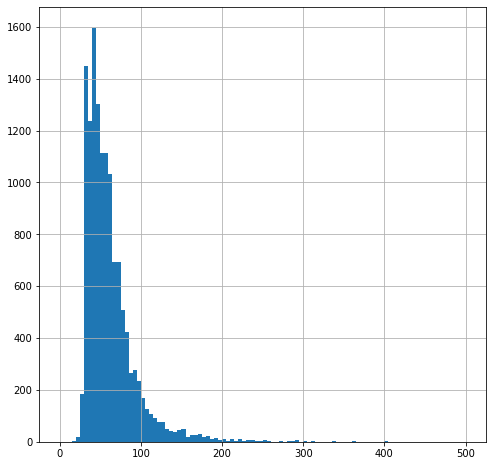

In [12]:
print(data_available['total_area'].describe())

print(data_available['total_area'].hist(bins = 100, range = (0,500), figsize = (8,8)))

Для нахождения зависимости ограничимся значениями общей площади до 300 кв.м.

In [13]:
# передаем нужный срез данных - столбцы с общей и жилой площадью 
# для квартир с общей площадью до 300 кв.м
x = data_available.query('total_area < 300')['total_area']
y = data_available.query('total_area < 300')['living_area']

# приведем к нужному для класса LinearRegression виду
x = np.array(x).reshape((-1,1))
y = np.array(y)

# не до конца понимаю, что здесь происходит (в примере сказано "совмещение модели")
model = LinearRegression().fit(x, y)

# вывод к. детерминации, значения y при х=0, к. наклона прямой
print('coefficient of determination:', model.score(x, y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8794204168195112
intercept: -2.331736430175795
slope: [0.616377]


# Комментарий наставника
Всё, что дальше - это просто классно! Здорово, что ты так обстоятельно подошел к вопросу и изучил кучу всего самостоятельно.

Можно обсуждать нюансы, но не хочется :) У тебя ультраобстоятельный подход!

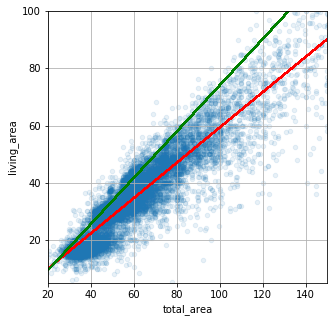

In [14]:
# выведем на общем графике диаграмму рассеяния 
# и две прямые: с коэфициентами из класса Linear Regression (красная)
# и с коэффициентами, найденными вручную (зеленая)
ax = plt.axes()
plt.plot(x, model.intercept_ + model.coef_*x, color = 'red')
plt.plot(x, -6.74 + 0.808*x, color = 'green')
data_available.plot(x='total_area', xlim=(20, 150),\
                    y='living_area', ylim=(5, 100),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, ax = ax)

Видим, что найденные вручную коэффициенты подходят плохо. Найденные по линейной регрессии подходят лучше. Попробуем разделить квартиры по количеству комнат (1, 2, 3, >3), и для каждого типа найти свои коэффициенты.

=====

Идею с разделением данных по кол-ву комнат позаимствовал из записи консультации, и хотя там рассматривалось заполнение площади кухни, решил применить и для жилой площади тоже. 

In [15]:
# 1 комнатные квартиры
x1 = np.array(data_available.query('total_area < 300 and rooms == 1')['total_area']).reshape((-1,1))
y1 = np.array(data_available.query('total_area < 300 and rooms == 1')['living_area'])
model = LinearRegression().fit(x1, y1)
score1 = model.score(x1, y1)
intercept1 = model.intercept_
coef1 = model.coef_

# 2-х комнатные квартиры
x2 = np.array(data_available.query('total_area < 300 and rooms == 2')['total_area']).reshape((-1,1))
y2 = np.array(data_available.query('total_area < 300 and rooms == 2')['living_area'])
model = LinearRegression().fit(x2, y2)
score2 = model.score(x2, y2)
intercept2 = model.intercept_
coef2 = model.coef_

# 3-х комнатные квартиры
x3 = np.array(data_available.query('total_area < 300 and rooms == 3')['total_area']).reshape((-1,1))
y3 = np.array(data_available.query('total_area < 300 and rooms == 3')['living_area'])
model = LinearRegression().fit(x3, y3)
score3 = model.score(x3, y3)
intercept3 = model.intercept_
coef3 = model.coef_

# 4-х и более комнатные квартиры
x4 = np.array(data_available.query('total_area < 300 and rooms > 3')['total_area']).reshape((-1,1))
y4 = np.array(data_available.query('total_area < 300 and rooms > 3')['living_area'])
model = LinearRegression().fit(x4, y4)
score4 = model.score(x4, y4)
intercept4 = model.intercept_
coef4 = model.coef_

# Комментарий наставника
Возможно, это лучше было обернуть в цикл для rooms в диапазоне от 1 до 4, например. Всё что больше уже не очень интересно, так очень мало данных

0.322 8.4 0.257
0.526 12.4 0.349
0.643 16.0 0.408
0.855 7.27 0.58


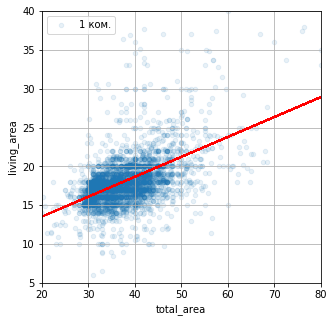

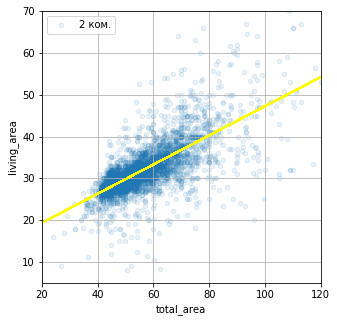

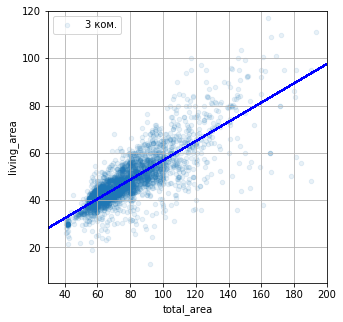

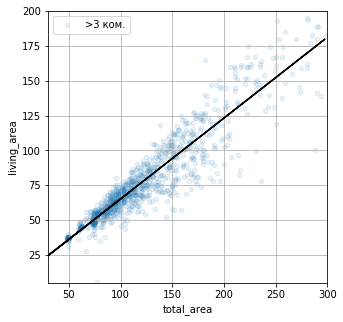

In [16]:
ax = plt.axes()
plt.plot(x, intercept1 + coef1*x, color = 'red')
data_available.query('total_area < 300 and rooms == 1').plot(x='total_area', xlim=(20, 80),\
                    y='living_area', ylim=(5, 40),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, ax = ax, label = '1 ком.')

data_available.query('total_area < 300 and rooms == 2').plot(x='total_area', xlim=(20, 120),\
                    y='living_area', ylim=(5, 70),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '2 ком.')
plt.plot(x, intercept2 + coef2*x, color = 'yellow')


data_available.query('total_area < 300 and rooms == 3').plot(x='total_area', xlim=(30, 200),\
                    y='living_area', ylim=(5, 120),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '3 ком.')
plt.plot(x, intercept3 + coef3*x, color = 'blue')


data_available.query('total_area < 300 and rooms > 3').plot(x='total_area', xlim=(30, 300),\
                    y='living_area', ylim=(5, 200),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '>3 ком.')
plt.plot(x, intercept4 + coef4*x, color = 'black')

print('{:.3}'.format(score1), '{:.3}'.format(intercept1), '{:.3}'.format(coef1[0]))
print('{:.3}'.format(score2), '{:.3}'.format(intercept2), '{:.3}'.format(coef2[0]))
print('{:.3}'.format(score3), '{:.3}'.format(intercept3), '{:.3}'.format(coef3[0]))
print('{:.3}'.format(score4), '{:.3}'.format(intercept4), '{:.3}'.format(coef4[0]))

# не удалось вывести графики в строку

Коэффициенты детерминации и графики для 1 и 2-х комнатных квартир, показывают, что зависимость жилой площади от общей не имеет ярко враженный линейный вид. Но за неимением лучших вариантов, заполним пропуски в столбце 'living_area' по значениям в столбце 'total_area'.

In [17]:
# создадим функцию для расчета жилой площади по известным значениям общей площади
def living_area_calc(row):
    total_area = row['total_area']
    living_area = row['living_area']
    rooms = row['rooms']
    if rooms == 1:
        if living_area == -1:
            return (intercept1 + coef1[0]*total_area)
        else:
            return living_area
    if rooms == 2:
        if living_area == -1:
            return (intercept2 + coef2[0]*total_area)
        else:
            return living_area
    if rooms == 3:
        if living_area == -1:
            return (intercept3 + coef3[0]*total_area)
        else:
            return living_area        
    if living_area == -1:
        return (intercept4 + coef4[0]*total_area)
    return living_area        
        
# применим функцию к каждой строке 
data['living_area'] = data.apply(living_area_calc, axis = 1)

In [18]:
# cравним показатели распределения в столбце 'living_area' для заполненных изначально данных 
print(data_available['living_area'].describe())

# и для всех данных после заполнения пропусков 
print(data['living_area'].describe())

count    13318.000000
mean        35.777321
std         22.857262
min          2.000000
25%         19.400000
50%         31.000000
75%         43.300000
max        409.700000
Name: living_area, dtype: float64
count    23565.000000
mean        34.577215
std         22.434612
min          2.000000
25%         18.700000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


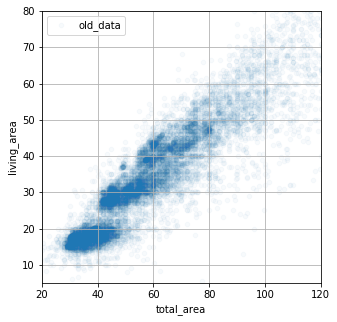

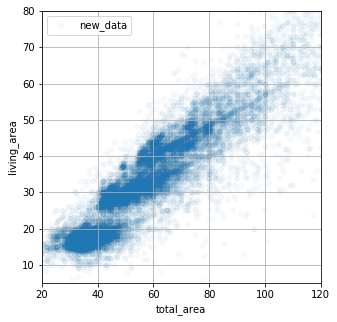

In [19]:
# выведем 2 диаграммы рассеяния 'living_area' - 'total_area'
# для известных данных 
data_available.plot(x='total_area', xlim=(20, 120),\
                    y = 'living_area', ylim=(5, 80),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .03, label = 'old_data')

# и для всех данных вместе с найденными по линейной зависимости
data.plot(x='total_area', xlim=(20, 120),\
          y = 'living_area', ylim=(5, 80),\
          kind='scatter', figsize=(5, 5),\
          sharex=False, grid=True, alpha = .03, label = 'new_data')

Видно, что значений стало больше, и распределены они примерно в тех же областях, что и известные записи. Все новые значения жилой площади лежат на соответствующих прямых и это выделяется. 

Судя по показателям распределения, набор данных изменился незначительно.

Перейдем к заполнению площади кухни.

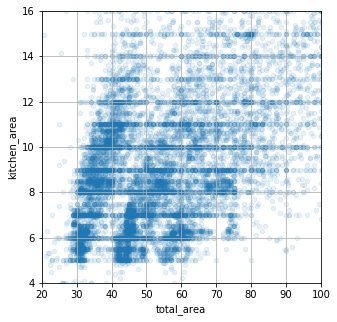

In [20]:
# диаграмма распределения для пар значений 'kitchen_area' - 'total_area'
data_available.plot(x='total_area', xlim=(20, 100),\
                    y='kitchen_area', ylim=(4, 16),\
                    kind='scatter', figsize=(5, 5),\
                    grid=True,alpha = 0.1)

Повторим шаги, которые были сделаны при заполнении жилой площади:
- разделим квартиры на 4 типа (1-, 2-х, 3-х, 4-х и более комнатные)
- для каждого типа найдём коэффициенты линейной зависимости площади кухни от общей площади
- заполним пропуски расчетными значениями.

0.462 -1.73 0.294
0.513 -5.77 0.281
0.488 -5.81 0.22
0.399 1.14 0.109


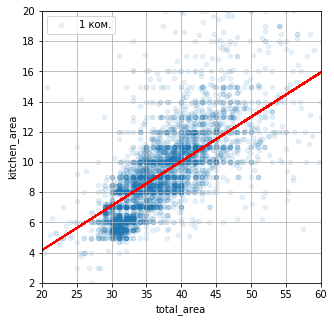

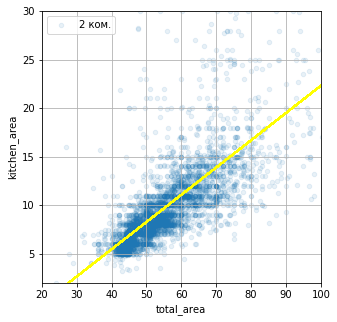

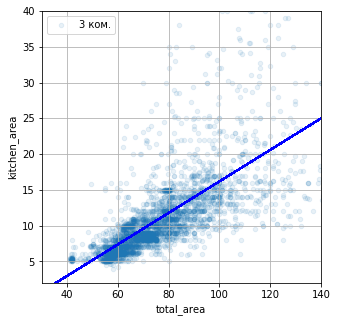

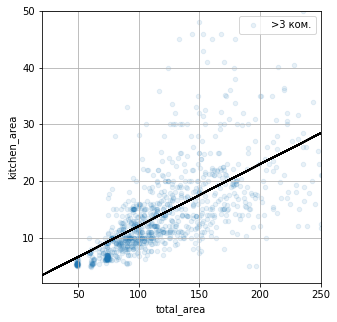

In [21]:
# 1 комнатные квартиры
x1 = np.array(data_available.query('total_area < 300 and rooms == 1')['total_area']).reshape((-1,1))
y1 = np.array(data_available.query('total_area < 300 and rooms == 1')['kitchen_area'])
model = LinearRegression().fit(x1, y1)
score1 = model.score(x1, y1)
intercept1 = model.intercept_
coef1 = model.coef_

# 2-х комнатные квартиры
x2 = np.array(data_available.query('total_area < 300 and rooms == 2')['total_area']).reshape((-1,1))
y2 = np.array(data_available.query('total_area < 300 and rooms == 2')['kitchen_area'])
model = LinearRegression().fit(x2, y2)
score2 = model.score(x2, y2)
intercept2 = model.intercept_
coef2 = model.coef_

# 3-х комнатные квартиры
x3 = np.array(data_available.query('total_area < 300 and rooms == 3')['total_area']).reshape((-1,1))
y3 = np.array(data_available.query('total_area < 300 and rooms == 3')['kitchen_area'])
model = LinearRegression().fit(x3, y3)
score3 = model.score(x3, y3)
intercept3 = model.intercept_
coef3 = model.coef_

# 4-х и более комнатные квартиры
x4 = np.array(data_available.query('total_area < 300 and rooms > 3')['total_area']).reshape((-1,1))
y4 = np.array(data_available.query('total_area < 300 and rooms > 3')['kitchen_area'])
model = LinearRegression().fit(x4, y4)
score4 = model.score(x4, y4)
intercept4 = model.intercept_
coef4 = model.coef_

ax = plt.axes()
plt.plot(x, intercept1 + coef1*x, color = 'red')
data_available.query('total_area < 300 and rooms == 1').plot(x='total_area', xlim=(20, 60),\
                    y='kitchen_area', ylim=(2, 20),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, ax = ax, label = '1 ком.')

data_available.query('total_area < 300 and rooms == 2').plot(x='total_area', xlim=(20, 100),\
                    y='kitchen_area', ylim=(2, 30),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '2 ком.')
plt.plot(x, intercept2 + coef2*x, color = 'yellow')


data_available.query('total_area < 300 and rooms == 3').plot(x='total_area', xlim=(30, 140),\
                    y='kitchen_area', ylim=(2, 40),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '3 ком.')
plt.plot(x, intercept3 + coef3*x, color = 'blue')


data_available.query('total_area < 300 and rooms > 3').plot(x='total_area', xlim=(20, 250),\
                    y='kitchen_area', ylim=(2, 50),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '>3 ком.')
plt.plot(x, intercept4 + coef4*x, color = 'black')

print('{:.3}'.format(score1), '{:.3}'.format(intercept1), '{:.3}'.format(coef1[0]))
print('{:.3}'.format(score2), '{:.3}'.format(intercept2), '{:.3}'.format(coef2[0]))
print('{:.3}'.format(score3), '{:.3}'.format(intercept3), '{:.3}'.format(coef3[0]))
print('{:.3}'.format(score4), '{:.3}'.format(intercept4), '{:.3}'.format(coef4[0]))

# создадим функцию для расчета площади кухни по известным значениям общей площади
def kitchen_area_calc(row):
    total_area = row['total_area']
    kitchen_area = row['kitchen_area']
    rooms = row['rooms']
    if rooms == 1:
        if kitchen_area == -1:
            return (intercept1 + coef1[0]*total_area)
        else:
            return kitchen_area
    if rooms == 2:
        if kitchen_area == -1:
            return (intercept2 + coef2[0]*total_area)
        else:
            return kitchen_area
    if rooms == 3:
        if kitchen_area == -1:
            return (intercept3 + coef3[0]*total_area)
        else:
            return kitchen_area        
    if kitchen_area == -1:
        return (intercept4 + coef4[0]*total_area)
    return kitchen_area        
        
# применим функцию к каждой строке 
data['kitchen_area'] = data.apply(kitchen_area_calc, axis = 1)

In [22]:
# cравним показатели распределения в столбце 'kitchen_area' для заполненных изначально данных 
print(data_available['kitchen_area'].describe())

# и для всех данных после заполнения пропусков 
print(data['kitchen_area'].describe())

count    13318.000000
mean        10.522426
std          6.011487
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
count    23565.000000
mean        10.491704
std          5.916579
min          1.300000
25%          7.000000
50%          9.050000
75%         12.000000
max        143.724975
Name: kitchen_area, dtype: float64


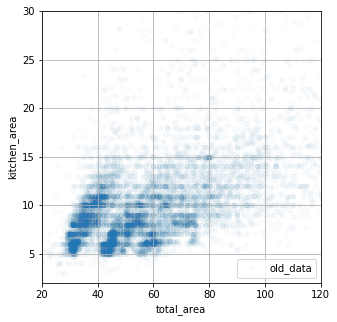

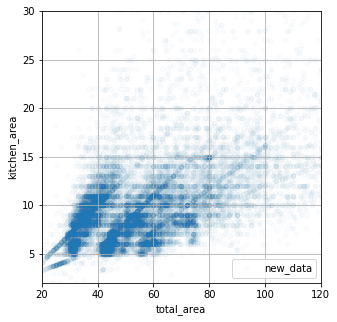

In [23]:
# построим диаграммы рассеяния 'kitchen_area' - 'total_area'
# для заполненных изначально данных 
data_available.plot(x='total_area', xlim=(20, 120),\
                    y = 'kitchen_area', ylim=(2, 30),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .02, label = 'old_data')

# и для всех данных после заполнения пропусков 
data.plot(x='total_area', xlim=(20, 120),\
          y = 'kitchen_area', ylim=(2, 30),\
          kind='scatter', figsize=(5, 5),\
          sharex=False, grid=True, alpha = .02, label = 'new_data')

Видно, что значений стало больше, и распределены они примерно в тех же областях, что и известные записи. Все новые значения площади кухни лежат на соответствующих прямых и это выделяется. 

Судя по показателям распределения, набор данных изменился незначительно.

Рассмотрим данные в столбце 'ceiling_height'.

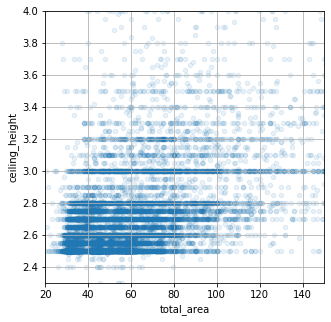

In [24]:
data_available.plot(x='total_area', xlim=(20, 150),\
                    y='ceiling_height', ylim=(2.3, 4),\
                    kind='scatter', figsize=(5, 5),\
                    grid=True,alpha = 0.1)

Судя по этой диаграмме и по матрице коэффициентов корреляции, данные в столбце 'ceiling_height' не связаны со значениями в других столбцах явным образом. Обычно высота потолка - величина, которая изменяется дискретно. Заполним пропуски не средним значением, а самым часто встречающимся.

In [25]:
data['ceiling_height'].value_counts().head()

-1.0    9084
 2.5    3515
 2.6    1645
 2.7    1571
 3.0    1108
Name: ceiling_height, dtype: int64

In [26]:
data.query('ceiling_height > 0')['ceiling_height'].mode().sum()

2.5

In [27]:
data['ceiling_height'] = data['ceiling_height']\
                        .where(data['ceiling_height'] > 0,\
                         data.query('ceiling_height > 0')['ceiling_height'].mode().sum())

In [28]:
data['ceiling_height'].value_counts().head()

2.5    12599
2.6     1645
2.7     1571
3.0     1108
2.8      988
Name: ceiling_height, dtype: int64

Продолжим исследование в предположении о том, что пропуски в столбце 'days_exposition' соответствуют тому, что объявление было опубликовано, но не было снято на момент получения данных. Предположим, что если объявление не было снято, значит квартира не была продана, значит в анализе длительности продажи квартир не будем учитывать такие записи. Оставим значение -1 на месте пропусков.

In [29]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,False,False,25.000000,-2,Санкт-Петербург,18863,16028,1,482,2,755,-1
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.50,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817,18603,0,-2,0,-2,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.50,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.50,14,80.913078,9,False,False,False,29.168021,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,False,False,41.000000,-2,Санкт-Петербург,31856,8098,2,112,1,48,121


Пропуски заполнены или характерными средними значениями или отрицательными значениями, в случае если данные невозможно восстановить. Необходимые столбцы приведены к целочисленному типу.


### 2.2 Добавление новых показателей:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж, на котором расположена квартира; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [30]:
#добавим столбец с ценой квадратного метра
data['sqmeter_price'] = data['last_price']/data['total_area']

In [31]:
# переведем строку с датой в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [32]:
#добавим столбцы с данными о дате публикации объявления 
# +1 к дню недели, чтобы привести в более привычный вид 1-7 вместо 0-6
data['weekday_of_exposition'] = data['first_day_exposition'].dt.weekday + 1
data['month_of_exposition'] = data['first_day_exposition'].dt.month
data['year_of_exposition'] = data['first_day_exposition'].dt.year

In [33]:
# добавим столбец с категорий этажа (первый/ последний/ другой)
# создадим функцию для определения и записи категории этажа
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'        
        
# применим функцию к каждой строке 
data['floor_type'] = data.apply(floor_type, axis = 1)

In [34]:
# добавим столбец с соотношением жилой площади к общей
data['living_total_ratio'] = data['living_area']/data['total_area']

In [35]:
# добавим столбец с соотношением площади кухни к общей
data['kitchen_total_ratio'] = data['kitchen_area']/data['total_area']

Изменим порядок столбцов в датасете.

In [36]:
data = data[['locality_name', 'rooms', 'sqmeter_price', 'last_price', 'total_area', 'living_area', 'kitchen_area',
             'floor', 'floors_total', 'floor_type', 'ceiling_height', 'is_apartment', 'is_studio', 'is_open_plan', 
             'balcony', 'living_total_ratio', 'kitchen_total_ratio', 'total_images', 'days_exposition', 
             'weekday_of_exposition', 'month_of_exposition', 'year_of_exposition','first_day_exposition', 
             'cityCenters_nearest','airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000',  
             'ponds_nearest']]

In [37]:
data.head()

,locality_name,rooms,sqmeter_price,last_price,total_area,living_area,kitchen_area,floor,floors_total,floor_type,ceiling_height,is_apartment,is_studio,is_open_plan,balcony,living_total_ratio,kitchen_total_ratio,total_images,days_exposition,weekday_of_exposition,month_of_exposition,year_of_exposition,first_day_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Санкт-Петербург,3,120370.370370,13000000.0,108.0,51.000000,25.000000,8,16,другой,2.70,False,False,False,-2,0.472222,0.231481,20,-1,4,3,2019,2019-03-07,16028,18863,1,482,2,755
1,посёлок Шушары,1,82920.792079,3350000.0,40.4,18.600000,11.000000,1,11,первый,2.50,False,False,False,2,0.460396,0.272277,7,81,2,12,2018,2018-12-04,18603,12817,0,-2,0,-2
2,Санкт-Петербург,2,92785.714286,5196000.0,56.0,34.300000,8.300000,4,5,другой,2.50,False,False,False,0,0.612500,0.148214,10,558,4,8,2015,2015-08-20,13933,21741,1,90,2,574
3,Санкт-Петербург,3,408176.100629,64900000.0,159.0,80.913078,29.168021,9,14,другой,2.50,False,False,False,0,0.508887,0.183447,0,424,5,7,2015,2015-07-24,6800,28098,2,84,3,234
4,Санкт-Петербург,2,100000.000000,10000000.0,100.0,32.000000,41.000000,13,14,другой,3.03,False,False,False,-2,0.320000,0.410000,2,121,2,6,2018,2018-06-19,8098,31856,2,112,1,48


# Задание 2. 
## Шаг 1. Исследовательский анализ данных 

    1. Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?
    2. Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.
    3. Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.
    4. Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.
    5. Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.
    6. Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

1. Построим гистограммы и выведем характеристики распределения для столбцов 'last_price', 'total_area', 'days_exposition', 'rooms', 'sqmeter_price'

# Комментарий наставника
В первом пункте всё отлично!

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

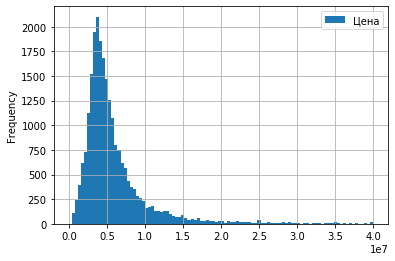

In [38]:
data['last_price'].plot(kind = 'hist', range = (0,40e6), bins = 100, label = 'Цена', legend=True, grid = True)
data['last_price'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

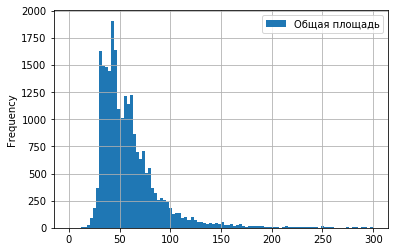

In [39]:
data['total_area'].plot(kind = 'hist', range = (0,300), bins = 100, label = 'Общая площадь', legend=True, grid = True)
data['total_area'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

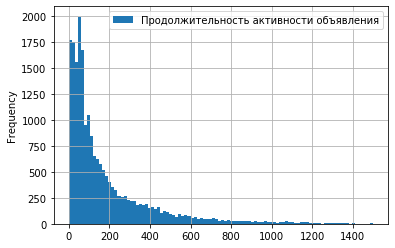

In [40]:
data.query('days_exposition > 0')['days_exposition']\
    .plot(kind = 'hist', range = (0,1500), bins = 100, label = 'Продолжительность активности объявления',\
     legend=True, grid = True)
data.query('days_exposition > 0')['days_exposition'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

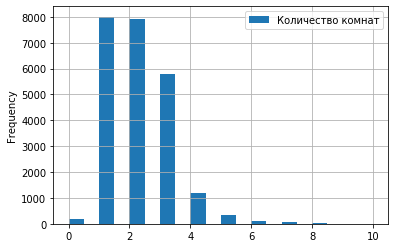

In [41]:
data['rooms'].plot(kind = 'hist', range = (0,10), bins = 20, label = 'Количество комнат', legend=True, grid = True)
data['rooms'].describe()

count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.118349e+02
25%      7.656613e+04
50%      9.500000e+04
75%      1.142132e+05
max      1.907500e+06
Name: sqmeter_price, dtype: float64

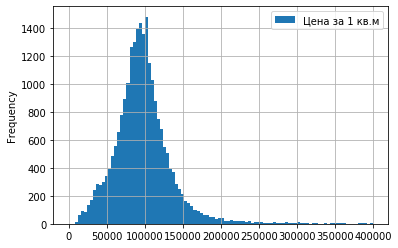

In [42]:
data['sqmeter_price'].plot(kind = 'hist', range = (0,400e3), bins = 100, label = 'Цена за 1 кв.м', legend=True, grid = True)
data['sqmeter_price'].describe()

Исходя из анализа графиков и характеристик распределения, типичные характеристики квартир:

- цена от 500.000 до 15.000.000
- общая площадь от 30 до 130 кв.м
- количество комнат от 1 до 5
- цена за 1 кв.м от 30.000 до 200.000

Если под длительностью процесса продажи подразумевать длительность активности объявления, то обычно процесс продажи длится от 1.5 месяцев (45 дней) до 1.5 лет (~550 дней). 

2. Рассмотрим квартиры с необычными параметрами (цена > 100.000.000 или общая площадь > 500 кв.м)

# Комментарий наставника
Мне казалось (по заданию), что их нужно было как раз исключить, а не рассматривать отдельно. Но это не суть важно в данном случае

In [43]:
data.query('last_price > 1e8 or total_area > 500')

,locality_name,rooms,sqmeter_price,last_price,total_area,living_area,kitchen_area,floor,floors_total,floor_type,ceiling_height,is_apartment,is_studio,is_open_plan,balcony,living_total_ratio,kitchen_total_ratio,total_images,days_exposition,weekday_of_exposition,month_of_exposition,year_of_exposition,first_day_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
789,Санкт-Петербург,4,4.354839e+05,135000000.0,310.0,250.000000,50.000000,2,5,другой,3.30,False,False,False,-2,0.806452,0.161290,20,342,2,5,2018,2018-05-22,7251,34159,2,295,3,190
1022,Санкт-Петербург,5,5.000000e+05,155000000.0,310.0,190.000000,63.000000,3,3,последний,5.30,False,False,False,2,0.612903,0.203226,20,-1,5,10,2018,2018-10-12,4785,24899,0,-2,1,603
1183,Санкт-Петербург,6,4.060564e+05,118000000.0,290.6,188.700000,22.000000,3,6,другой,3.82,False,False,False,1,0.649346,0.075705,20,316,5,6,2018,2018-06-01,6224,25309,1,217,0,-2
1295,Санкт-Петербург,5,4.285714e+05,120000000.0,280.0,162.000000,30.000000,3,4,другой,4.70,False,False,False,-2,0.578571,0.107143,14,225,4,7,2018,2018-07-12,4247,24680,1,464,3,339
1431,Санкт-Петербург,3,1.736842e+06,330000000.0,190.0,95.000000,40.000000,5,7,другой,3.50,False,False,False,-2,0.500000,0.210526,19,233,3,4,2018,2018-04-04,1197,23011,3,519,3,285
1922,Санкт-Петербург,4,5.567929e+05,125000000.0,224.5,163.500000,30.000000,3,4,другой,2.50,False,False,False,1,0.728285,0.133630,11,174,2,1,2017,2017-01-24,2335,22805,0,-2,2,497
2235,Санкт-Петербург,5,4.285470e+05,130278280.0,304.0,183.532123,34.321281,7,9,другой,3.11,False,False,False,0,0.603724,0.112899,9,599,5,7,2015,2015-07-24,5913,25593,2,164,0,-2
2527,Санкт-Петербург,4,6.600000e+05,159984000.0,242.4,131.000000,20.000000,7,9,другой,3.85,False,False,False,0,0.540429,0.082508,16,501,4,8,2015,2015-08-27,2242,21946,1,679,1,227
3103,Санкт-Петербург,7,2.218700e+05,140000000.0,631.0,373.134260,60.000000,5,5,последний,2.50,False,False,False,-2,0.591338,0.095087,19,-1,6,3,2019,2019-03-30,4972,25707,0,-2,2,210
4216,Санкт-Петербург,7,9.671180e+04,50000000.0,517.0,332.000000,22.000000,3,4,другой,2.50,False,False,False,-2,0.642166,0.042553,1,-1,6,10,2017,2017-10-14,1847,22835,2,477,2,540


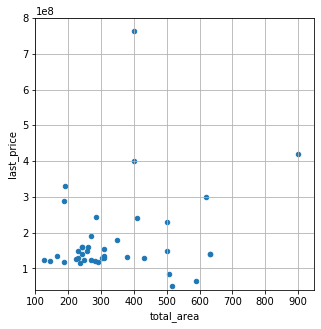

In [44]:
data.query('last_price > 1e8 or total_area > 500')\
              .plot(x='total_area', xlim=(100,950),\
                    y='last_price', ylim=(4e7, 800e6),\
                    kind='scatter', figsize=(5, 5),\
                    grid=True)

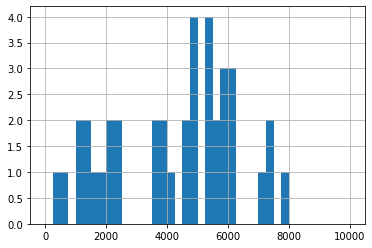

In [45]:
data.query('last_price > 1e8 or total_area > 500')\
.query('cityCenters_nearest > 0')['cityCenters_nearest'].hist(bins = 40, range = (0,10e3))

40 квартир, которые расположены недалеко от центра Санкт-Петерубрга. Может быть, это объясняет их очень высокую цену.

Рассмотрим объявления без фотографий.

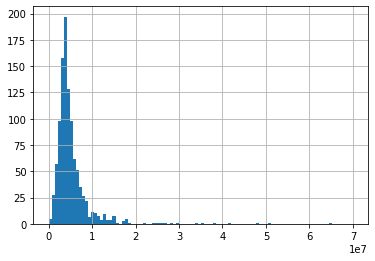

In [46]:
data.query('total_images == 0')['last_price'].hist(bins = 100, range = (0,7e7))

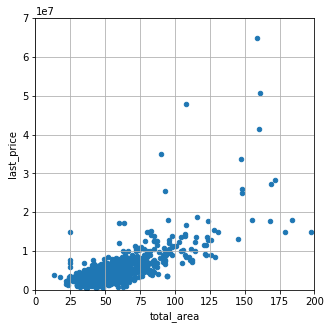

In [47]:
data.query('total_images == 0')\
              .plot(x='total_area', xlim=(0,200),\
                    y='last_price', ylim=(0, 7e7),\
                    kind='scatter', figsize=(5, 5),\
                    grid=True)

В наборе данных некоторое количество объявлений без фотографий, но с довольно большой ценой (до 65 млн), это необычно и такие объявления нужно рассматривать внимательнее.

3. Изучим влияение отдельных факторов на стоимость квартиры. Для этого рассчитаем коэффициенты корреляции для нескольких пар столбцов. Также, будем использовать сводные таблицы для расчета мединной цены квадратного метра с группировкой по разным характеристикам.

# Комментарий наставника
Вот тут сложный вопрос. Задание, очевидно, требует сравнивать с ценой. Но мне кажется, существенно логичнее здесь смотреть на цену за метр. Я не предлагаю переделывать. Просто мысль вслух. 

Очевидно ведь, что цена на квартиру тем больше, чем больше там метраж и кол-во комнат, например. А вот от этажа будет зависеть крайне слабо, т.к. на разных этажах могут быть квартиры очень разного метража.

In [48]:
# коэффициенты корреляции со столбцом 'last_price' для разных столбцов
data[['last_price','rooms','total_area','living_area','kitchen_area', 
      'ceiling_height','floor','floors_total' ]].corr()['last_price']

last_price        1.000000
rooms             0.363191
total_area        0.653621
living_area       0.583164
kitchen_area      0.492779
ceiling_height    0.066435
floor             0.026842
floors_total     -0.006745
Name: last_price, dtype: float64

Линейная зависимость наиболее выражена для 'last_price' - 'total_area' и 'last_price' - 'living_area'. Но коэффициент корреляции не очень высокий.

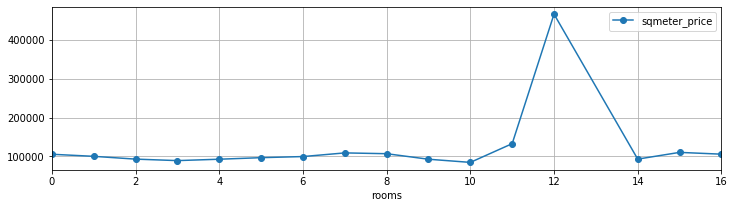

In [49]:
# построим график зависимости медианы цены за 1 кв. м от кол-ва комнат
data.pivot_table(index='rooms', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-', xlim = (0,16))

In [50]:
data.query('rooms.isin([11,12])')

,locality_name,rooms,sqmeter_price,last_price,total_area,living_area,kitchen_area,floor,floors_total,floor_type,ceiling_height,is_apartment,is_studio,is_open_plan,balcony,living_total_ratio,kitchen_total_ratio,total_images,days_exposition,weekday_of_exposition,month_of_exposition,year_of_exposition,first_day_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
645,Санкт-Петербург,11,95264.017420,17500000.0,183.7,138.8,13.3,7,7,последний,3.40,False,False,False,-2,0.755580,0.072401,3,-1,7,7,2018,2018-07-01,3148,23606,0,-2,0,-2
9642,Санкт-Петербург,11,170015.455951,33000000.0,194.1,129.0,11.9,2,5,другой,3.43,False,False,False,-2,0.664606,0.061309,8,813,2,2,2017,2017-02-07,1015,21469,1,686,2,66
19431,Санкт-Петербург,12,466666.666667,420000000.0,900.0,409.7,112.0,25,25,последний,2.80,False,False,False,-2,0.455222,0.124444,8,106,3,12,2017,2017-12-06,7877,30706,0,-2,2,318


Всего 2 квартиры с 11-ю, и 1 - с 12-ю комнатами.

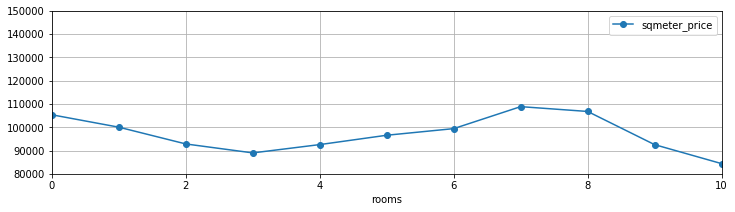

In [51]:
# изменим границы отображения и исключим 11-ти и 12-ти комнатные квартиры
data.query('rooms not in [11,12]').pivot_table(index='rooms', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-', xlim = (0,10), ylim = (80e3,150e3))

Цена 1 кв.м больше всего для квартир с 0, 1, 7 комнатами, а меньше всего для 3-х комнатных квартир.

# Комментарий наставника
Я бы тут оставил какое-то пояснение: цена за метр падает с ростом кол-ва квартир, пока мы не уходим в область элитного жилья (7-комнатная квартира - это точно элитное жильё)

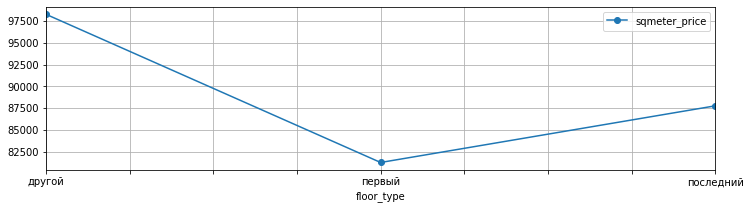

In [52]:
# построим график зависимости медианы цены за 1 кв. м от этажа
data.pivot_table(index='floor_type', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-')

Квартиры на 1-м этаже самые дешевые, на последнем дороже, но всё равно дешевле, чем на других этажах.

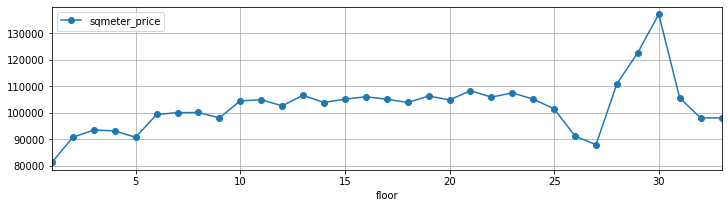

In [53]:
# построим график зависимости медианы цены за 1 кв. м от этажа
data.pivot_table(index='floor', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-')

Цена 1 кв. м в зависимости от номера этажа меняется нелинейным образом, но до 21 этажа, в среднем увеличивается при увеличении этажа.

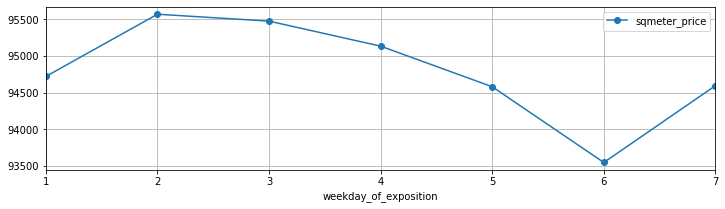

In [54]:
# построим график зависимости медианы цены за 1 кв. м от дня недели размещения объявления
data.pivot_table(index='weekday_of_exposition', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-')

Разница в цене 1 кв. м не зависит от дня размещения объявления существенным образом (разница ~2000 при среднем в 94.500). Самая низкая цена в объявлениях, размещенных в субботу, самая высокая - во вторник.

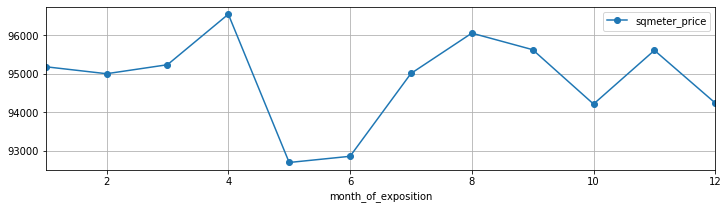

In [55]:
# построим график зависимости медианы цены за 1 кв. м от месяца размещения объявления
data.pivot_table(index='month_of_exposition', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-')

Разница в цене 1 кв. м не зависит от месяца размещения объявления существенным образом (разница ~4000 при среднем в 94.500). Наименьшая стоимость указана в объявлениях, размещенных в мае и июне; самая высокая - в апреле и августе.

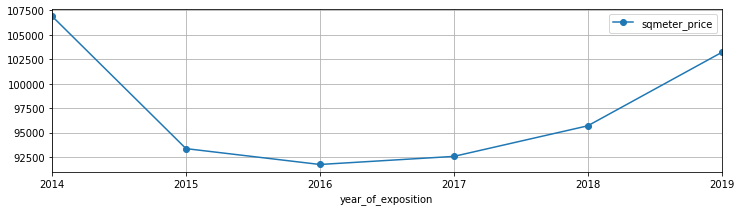

In [56]:
# построим график зависимости медианы цены за 1 кв. м от года размещения объявления
data.pivot_table(index='year_of_exposition', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-')

В 2016 году стоимость квартир в объявлениях достигла минимума, с тех пор растет, но ещё не достигла уровня цен 2014 года.

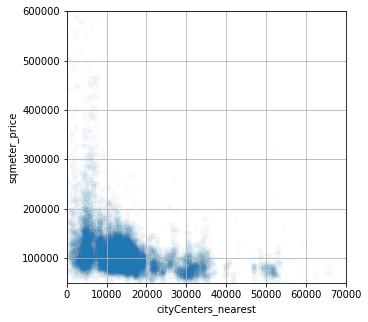

In [57]:
# построим диаграмму рассения для пар значений 'sqmeter_price' - 'cityCenters_nearest'
data.query('cityCenters_nearest > 0')\
              .plot(x='cityCenters_nearest', xlim=(0,70e3),\
                    y='sqmeter_price', ylim=(50e3, 600e3),\
                    kind='scatter', figsize=(5, 5),\
                    grid=True, alpha = .02)

Цена за 1 кв. м ожидаемо уменьшается при увеличении расстояния от центра города. Выделяются несколько скоплений, скорее всего это пригороды Санкт-Петербурга. Проверим, построив гистограмму для столбца 'cityCenters_nearest'.

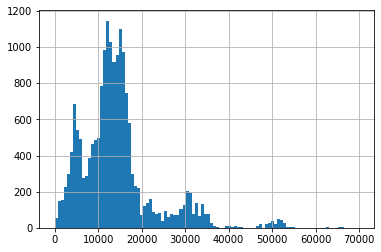

In [58]:
data.query('cityCenters_nearest > 0')['cityCenters_nearest'].hist(bins = 100, range = (0,70e3))

Гистограмма для столбца 'cityCenters_nearest' имеет всплески на тех же значениях, где скопления на диаграмме рассеяния (15.000 м, 22.000 м, 30.000 м, 52.000 м).

4. Выведем медианнцую цену 1 кв.м. для пригородов Санкт-Петербурга с наибольшим кол-вом объявлений.

In [59]:
data.pivot_table(index = 'locality_name', values = 'sqmeter_price', aggfunc = ['median','count'])\
    .sort_values(by =('count','sqmeter_price'), ascending = False).head(11)

,median,count
,sqmeter_price,sqmeter_price
locality_name,,
Санкт-Петербург,104774.535809,15651
посёлок Мурино,85878.462169,520
посёлок Шушары,76829.268293,439
Всеволожск,65789.473684,398
Пушкин,100000.000000,369
Колпино,74723.748474,338
посёлок Парголово,91642.857143,327
Гатчина,67796.610169,307


В пригородах Санкт-Петербурга с наибольшим количеством объявлений медианная цена за 1 кв.м. изменяется от 58.000 (город Выборг) до 100.000 (город Пушкин).

5. Рассчитаем коэффициенты корреляции цены с основными факторами для двух групп данных: квартиры в центре (расстояние до центра < 6.000 м) и вне центра (расстояние >= 6.000)

-выделим только столбцы с основными параметрами;

-выделим строки по фильтру расстояния до центра, числу комнат, площади.

Затем сравним с коэффициентами корреляции для всего набора данных.

In [60]:
# к. корреляции цены с основными параметрами для выборки типичных квартир в центре 
# кол-во записей в выборке 1.988
data.query('0 < cityCenters_nearest < 6000 and rooms < 4 and total_area < 150')\
    [['last_price','rooms','total_area','living_area','kitchen_area', 'floor']].corr()['last_price']

last_price      1.000000
rooms           0.282076
total_area      0.626749
living_area     0.460176
kitchen_area    0.495915
floor           0.146198
Name: last_price, dtype: float64

In [61]:
# к. корреляции цены с основными параметрами для выборки типичных квартир вне центра
# кол-во записей в выборке 14.443
data.query('cityCenters_nearest >= 6000 and rooms < 4 and total_area < 150')\
    [['last_price','rooms','total_area','living_area','kitchen_area', 'floor']].corr()['last_price']

last_price      1.000000
rooms           0.409143
total_area      0.735971
living_area     0.588404
kitchen_area    0.578625
floor           0.090738
Name: last_price, dtype: float64

In [62]:
# к. корреляции цены с основными параметрами для всего набора данных
data[['last_price','rooms','total_area','living_area','kitchen_area', 'floor']].corr()['last_price']

last_price      1.000000
rooms           0.363191
total_area      0.653621
living_area     0.583164
kitchen_area    0.492779
floor           0.026842
Name: last_price, dtype: float64

К. корреляции небольшие при любых выборках, но в случае типовых квартир вне центра, самые большие коэффициенты корреляции между ценой и общей площадью и между ценой и площадью кухни.

6. Рассмотрим объявления с апартаментами, студиями, квартирами со свободной планировкой.

In [63]:
data.query('is_apartment == True or is_studio == True or is_open_plan == True')

,locality_name,rooms,sqmeter_price,last_price,total_area,living_area,kitchen_area,floor,floors_total,floor_type,ceiling_height,is_apartment,is_studio,is_open_plan,balcony,living_total_ratio,kitchen_total_ratio,total_images,days_exposition,weekday_of_exposition,month_of_exposition,year_of_exposition,first_day_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
144,посёлок Мурино,0,90740.740741,2450000.0,27.00,15.500000,4.084542,2,24,другой,2.50,False,True,False,2,0.574074,0.151279,1,181,4,3,2017,2017-03-30,-2,-2,-2,-2,-2,-2
347,деревня Кудрово,0,92800.000000,2320000.0,25.00,17.000000,3.866226,1,14,первый,2.50,False,False,True,0,0.680000,0.154649,4,45,3,9,2017,2017-09-27,-2,-2,-2,-2,-2,-2
438,Санкт-Петербург,0,91479.158982,2480000.0,27.11,24.750000,4.096549,4,17,другой,2.50,False,True,False,2,0.912947,0.151108,8,64,1,3,2018,2018-03-12,15015,38171,0,-2,2,982
505,посёлок Парголово,0,98110.465116,3375000.0,34.40,24.300000,4.892310,19,26,другой,2.50,False,False,True,1,0.706395,0.142218,0,430,2,3,2017,2017-03-28,19292,53115,0,-2,1,593
540,Петергоф,2,225971.731449,12790000.0,56.60,29.400000,10.127120,1,3,первый,3.50,True,False,False,-2,0.519435,0.178924,11,-1,2,11,2018,2018-11-06,30437,35248,3,53,3,22
605,посёлок Шушары,0,74000.000000,1850000.0,25.00,21.761493,3.866226,7,10,другой,2.50,False,True,False,-2,0.870460,0.154649,2,29,3,2,2019,2019-02-20,-2,-2,-2,-2,-2,-2
693,деревня Кудрово,0,103734.439834,2500000.0,24.10,17.500000,3.767984,21,25,другой,2.75,False,True,False,-2,0.726141,0.156348,12,201,5,12,2017,2017-12-01,-2,-2,-2,-2,-2,-2
712,посёлок Шушары,0,88235.294118,1500000.0,17.00,12.000000,2.992963,1,9,первый,2.70,False,True,False,0,0.705882,0.176057,5,40,3,6,2017,2017-06-07,29846,18654,0,-2,0,-2
776,посёлок Мурино,0,99616.858238,2600000.0,26.10,22.399298,3.986300,8,18,другой,2.50,False,False,True,1,0.858211,0.152732,9,45,2,2,2018,2018-02-20,-2,-2,-2,-2,-2,-2
835,поселок Новый Свет,0,54285.714286,1900000.0,35.00,15.000000,4.957805,3,5,другой,2.70,False,False,True,1,0.428571,0.141652,14,7,5,4,2017,2017-04-14,-2,-2,-2,-2,-2,-2


In [64]:
data.query('is_apartment == True or is_studio == True or is_open_plan == True')['total_area'].count()

263

Рассмотрим распределение характерных параметров на гистограммах.

count    2.630000e+02
mean     5.371459e+06
std      9.464524e+06
min      9.457500e+05
25%      2.380000e+06
50%      3.100000e+06
75%      4.000000e+06
max      8.400000e+07
Name: last_price, dtype: float64

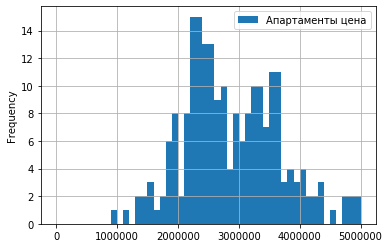

In [65]:
data.query('is_apartment == True or is_studio == True or is_open_plan == True')['last_price']\
.plot(kind = 'hist', range = (0,5e6), bins = 50, label = 'Апартаменты цена', legend=True, grid = True)

data.query('is_apartment == True or is_studio == True or is_open_plan == True')['last_price'].describe()

count    263.000000
mean      40.701939
std       45.199216
min       15.500000
25%       25.000000
50%       27.500000
75%       33.500000
max      507.000000
Name: total_area, dtype: float64

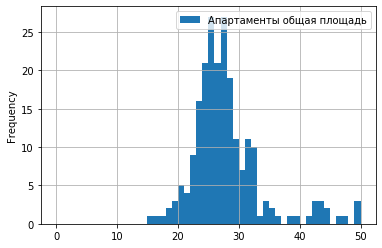

In [66]:
data.query('is_apartment == True or is_studio == True or is_open_plan == True')['total_area']\
.plot(kind = 'hist', range = (0,50), bins = 50, label = 'Апартаменты общая площадь', legend=True, grid = True)

data.query('is_apartment == True or is_studio == True or is_open_plan == True')['total_area'].describe()

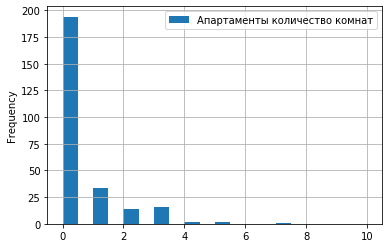

In [67]:
data.query('is_apartment == True or is_studio == True or is_open_plan == True')['rooms']\
.plot(kind = 'hist', range = (0,10), bins = 20, label = 'Апартаменты количество комнат', legend=True, grid = True)

count    263.000000
mean       7.684411
std        6.055345
min        1.000000
25%        3.000000
50%        6.000000
75%       11.000000
max       26.000000
Name: floor, dtype: float64

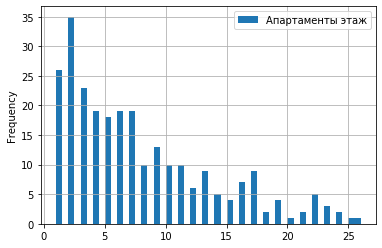

In [68]:
data.query('is_apartment == True or is_studio == True or is_open_plan == True')['floor']\
.plot(kind = 'hist', bins = 50, label = 'Апартаменты этаж', legend=True, grid = True)

data.query('is_apartment == True or is_studio == True or is_open_plan == True')['floor'].describe()

count       263.000000
mean     116206.359819
std       59358.913709
min       34375.000000
25%       90824.915825
50%      106250.000000
75%      127349.745230
max      600000.000000
Name: sqmeter_price, dtype: float64

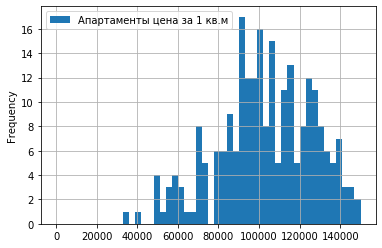

In [69]:
data.query('is_apartment == True or is_studio == True or is_open_plan == True')['sqmeter_price']\
.plot(kind = 'hist', range = (0,150e3), bins = 50, label = 'Апартаменты цена за 1 кв.м', legend=True, grid = True)
data['sqmeter_price'].describe()

data.query('is_apartment == True or is_studio == True or is_open_plan == True')['sqmeter_price'].describe()

Исходя из анализа графиков и характеристик распределения, типичные характеристики апартаментов/студий:
- цена от 1.500.000 до 4.000.000;
- общая площадь от 20 до 35 кв.м ;
- количество комнат от 0 до 3 ;
- цена за 1 кв.м от 70.000 до 140.000.

Рассмотрим зависимость медианной цены 1 кв.м апартаментов от характеристик квартиры (кол-во комната, категория этажа, этаж). Сравним с зависимостями для квартир типовой планировки.

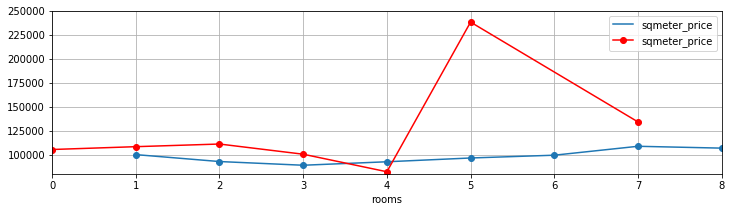

In [70]:
# график зависимости медианы цены за 1 кв. м типовых квартир от кол-во комнат
ax = data.query('is_apartment == False and is_studio == False and is_open_plan == False')\
    .pivot_table(index='rooms', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Типовые')

# построим график зависимости медианы цены за 1 кв. м апартаментов от кол-ва комнат
data.query('is_apartment == True or is_studio == True or is_open_plan == True')\
    .pivot_table(index='rooms', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='ro-', ax = ax, label = 'Апартаменты', xlim = (0,8), ylim = (8e4,25e4))

1 кв. м в 4-х комнатных апартаментах стоит дешевле всего, а в 5-ти комнатных - дороже всего, разница ~в 4 раза. В целом, стоимость 1 кв.м в апартаментах выше.

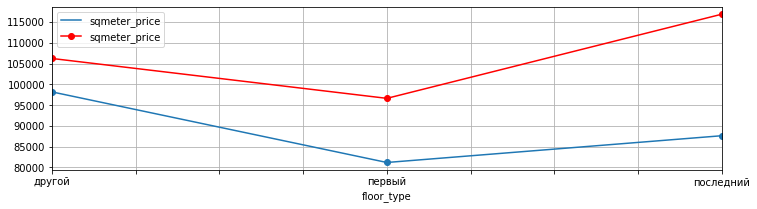

In [71]:
# график зависимости медианы цены за 1 кв. м типовых квартир от этажа
ax = data.query('is_apartment == False and is_studio == False and is_open_plan == False')\
    .pivot_table(index='floor_type', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Типовые')

# построим график зависимости медианы цены за 1 кв. м апартаментов от этажа
data.query('is_apartment == True or is_studio == True or is_open_plan == True')\
    .pivot_table(index='floor_type', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='ro-', ax = ax, label = 'Апартаменты')

1 кв.м на последних этажах апартаментов и студий стоит больше, чем на первом и на других этажах.

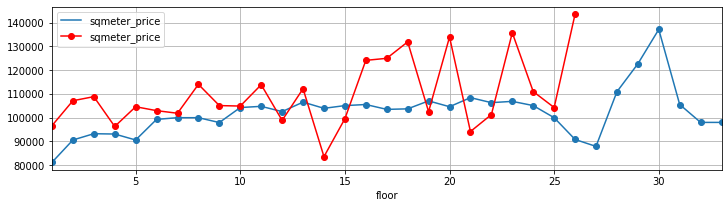

In [72]:
# график зависимости медианы цены за 1 кв. м типовых квартир от этажа
ax = data.query('is_apartment == False and is_studio == False and is_open_plan == False')\
    .pivot_table(index='floor', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Типовые')

# построим график зависимости медианы цены за 1 кв. м апартаментов от этажа
data.query('is_apartment == True or is_studio == True or is_open_plan == True')\
    .pivot_table(index='floor', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='ro-', ax = ax, label = 'Апартаменты')

Завивисимость цены 1 кв.м от этажа носит нелинейный характер, но в среднем виден рост стоимости при увеличении этажа.

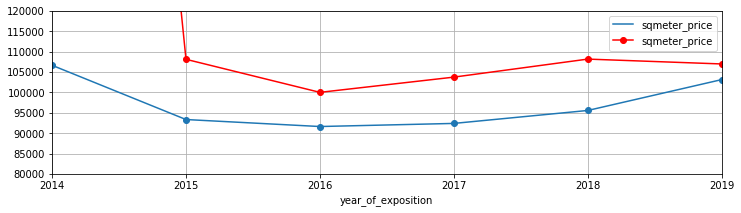

In [73]:
# график зависимости медианы цены за 1 кв. м типовых квартир от года размещения объявления
ax = data.query('is_apartment == False and is_studio == False and is_open_plan == False')\
    .pivot_table(index='year_of_exposition', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Типовые')

# построим график зависимости медианы цены за 1 кв. м апартаментов от года размещения объявления
data.query('is_apartment == True or is_studio == True or is_open_plan == True')\
    .pivot_table(index='year_of_exposition', values='sqmeter_price', aggfunc = 'median')\
    .plot(grid=True, figsize=(12, 3), style ='ro-', ax = ax, label = 'Апартаменты', ylim = (8e4,12e4))

Для обоих типов квартир наблюдается спад стоимости 1 кв. м в 2016 году, кроме того, видно снижение стоимости 1 кв.м для апартаментов/студий в 2019 по сравнению с 2018 годом.

## Шаг 2. Общие выводы

В ходе исследования определены типичные параметры всех квартир:
- цена от 500.000 до 15.000.000
- общая площадь от 30 до 130 кв.м
- количество комнат от 1 до 5
- цена за 1 кв.м от 30.000 до 200.000

и квартир со свободной планировкой (а также студий/ апартаментов):

- цена от 1.500.000 до 4.000.000;
- общая площадь от 20 до 35 кв.м ;
- количество комнат от 0 до 3 ;
- цена за 1 кв.м от 70.000 до 140.000.

В среднем объявление о продаже активно от 1.5 месяцев до 1.5 лет.

Квартиры на последних этажах в среднем дороже, чем на первых, но дешевле, чем на любых других.

Апартаменты/студии/квартиры со свободной планировкой в среднем дороже, чем квартиры с типовой планировкой, но в зависимости от этажа может быть и наоборот.

# Комментарий наставника
Все здорово. Из каких-то аналитических моментов я бы выделил:
1. Корреляция довольно бесполезная штука при большом кол-ве факторов. Например, зависимость между площадью и стоимостью квадратного метра сильно размазывается, если не зафиксировать один город. Иначе для одной площади в разных городах будет очень разная цена и корреляция будет очень низкой. Ты это наблюдаешь, на самом деле, в своих табличках. 
2. В графиках с кол-вом комнат, я бы вовсе не выводил все больше 4 комнат, например. Там очень мало значений, квартиры становятся нетипичными и сравнение только запутывается.
